In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, cross_validation, svm

In [9]:
# 使用鸢尾花数据
def load_data():
    iris = datasets.load_iris()
    x_train = iris.data
    y_train = iris.target
    return cross_validation.train_test_split(x_train, y_train, test_size = 0.25, random_state = 0, stratify = y_train)

In [11]:
# 线性分类器LinearSVC
def test_LinearSVC(*data):
    x_train, x_test, y_train, y_test = data
    svc = svm.LinearSVC()
    svc.fit(x_train,y_train)
    print('Coefficients:{0}, intercept {1}'.format(svc.coef_, svc.intercept_))
    print('Score: {0}'.format(svc.score(x_test, y_test)))

x_train, x_test, y_train, y_test = load_data()
test_LinearSVC(x_train, x_test, y_train, y_test )

Coefficients:[[ 0.20959392  0.39923779 -0.81739259 -0.4423183 ]
 [-0.12943829 -0.78367336  0.52000074 -1.02409687]
 [-0.80296181 -0.87608296  1.21356733  1.81000197]], intercept [ 0.119738    2.03628071 -1.44375306]
Score: 0.9736842105263158


In [13]:
# 损失函数对结果的影响
def test_LinearSVC_loss(*data):
    x_train, x_test, y_train, y_test = data
    losses = ('hinge','squared_hinge')
    for loss in losses:
        svc = svm.LinearSVC(loss=loss)
        svc.fit(x_train,y_train)
        print(loss)
        print('Coefficients:{0}, intercept {1}'.format(svc.coef_, svc.intercept_))
        print('Score: {0}'.format(svc.score(x_test, y_test)))

x_train, x_test, y_train, y_test = load_data()
test_LinearSVC_loss(x_train, x_test, y_train, y_test )

hinge
Coefficients:[[ 0.36637401  0.32164134 -1.07534387 -0.57004977]
 [ 0.47106798 -1.55787524  0.39835903 -1.34695567]
 [-1.21290848 -1.15164257  1.85318358  1.97845665]], intercept [ 0.18050384  1.34290245 -1.43590004]
Score: 0.9736842105263158
squared_hinge
Coefficients:[[ 0.20959201  0.39924182 -0.81738995 -0.44231421]
 [-0.12812173 -0.78720985  0.52072245 -1.02332296]
 [-0.80298341 -0.87646055  1.21359788  1.80987618]], intercept [ 0.11973942  2.04243821 -1.44436839]
Score: 0.9736842105263158


In [14]:
# 惩罚项形式的影响
def test_LinearSVC_L12(*data):
    x_train, x_test, y_train, y_test = data
    L12 = ('l1','l2')
    for l in L12:
        svc = svm.LinearSVC(penalty=l,dual=False)
        svc.fit(x_train,y_train)
        print('panalty:{0}'.format(l))
        print('Coefficients:{0}, intercept {1}'.format(svc.coef_, svc.intercept_))
        print('Score: {0}'.format(svc.score(x_test, y_test)))

x_train, x_test, y_train, y_test = load_data()
test_LinearSVC_L12(x_train, x_test, y_train, y_test )

panalty:l1
Coefficients:[[ 0.16232657  0.52363926 -0.93207016  0.        ]
 [-0.15452877 -0.9082551   0.48326127 -0.93365227]
 [-0.5703139  -0.85186166  0.97134702  2.31141743]], intercept [ 0.          2.59055611 -2.60668505]
Score: 0.9736842105263158
panalty:l2
Coefficients:[[ 0.20966721  0.39922563 -0.81739423 -0.44237657]
 [-0.13079574 -0.7872181   0.52298032 -1.02445961]
 [-0.80308922 -0.87656106  1.21391169  1.81021937]], intercept [ 0.11945388  2.04805235 -1.44409296]
Score: 0.9736842105263158


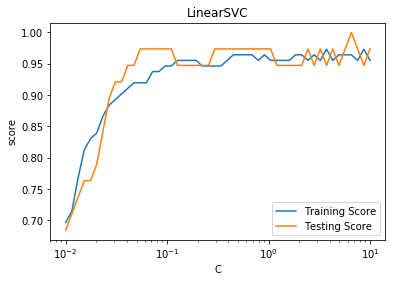

In [18]:
# 惩罚项系数的影响
def test_LinearSVC_C(*data):
    train_x,test_x, train_y, test_y = data
    Cs = np.logspace(-2,1)
    train_score = []
    test_score = []
    for C in Cs:
        svc = svm.LinearSVC(C=C)
        svc.fit(train_x,train_y)
        train_score.append(svc.score(train_x,train_y))
        test_score.append(svc.score(test_x,test_y))
            
    # 绘图：
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(Cs,train_score,label='Training Score')
    ax.plot(Cs,test_score, label='Testing Score')
    ax.set_xlabel(r'C')
    ax.set_ylabel('score')
    ax.set_title('LinearSVC')
    ax.set_xscale('log')
    ax.legend(loc='best')
    plt.show()
    
x_train, x_test, y_train, y_test = load_data()
test_LinearSVC_C(x_train, x_test, y_train, y_test )